In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  recall_score


In [5]:
dftrain = pd.read_csv("hospitalizaciones_train.csv")
dftrain.head(5)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [6]:
#explorando las variables unicas
for i in range(15):
    print (dftrain.columns[i])
    print(dftrain.iloc[:,i].unique())
    print("\n")

Available Extra Rooms in Hospital
[ 4  2  7  3  5 10  6  1 21  8 11 13  9 14 24  0 12 20]


Department
['gynecology' 'anesthesia' 'TB & Chest disease' 'radiotherapy' 'surgery']


Ward_Facility_Code
['D' 'B' 'E' 'F' 'A' 'C']


doctor_name
['Dr Sophia' 'Dr Olivia' 'Dr Mark' 'Dr John' 'Dr Sarah' 'Dr Sam'
 'Dr Nathan' 'Dr Simon' 'Dr Isaac']


staff_available
[ 0  2  8  7 10  5  9  3  6  4  1]


patientid
[33070 34808 44577 ... 40881 51342 63598]


Age
['41-50' '31-40' '21-30' '71-80' '11-20' '51-60' '61-70' '81-90' '91-100'
 '0-10']


gender
['Female' 'Male' 'Other']


Type of Admission
['Trauma' 'Urgent' 'Emergency']


Severity of Illness
['Extreme' 'Minor' 'Moderate']


health_conditions
['Diabetes' 'Heart disease' 'None' 'Other' 'Asthama' 'High Blood Pressure']


Visitors with Patient
[ 4  2  3 11  9  6  8 12  5  1 14  7 13 10 22 18  0 16 20 21 19 23 15 24
 17 30 32 25]


Insurance
['Yes' 'No']


Admission_Deposit
[2966.408696 3554.835677 5624.733654 ... 3816.99421  3841.577491
 4329.04

In [7]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [8]:
enc = OneHotEncoder(sparse=False)
departamentos=dftrain["Department"].values.reshape(-1,1)
enc.fit(departamentos)
enc2=enc.transform(departamentos)
print(enc.categories_)
dftrain["gynecoloy_encoded"]=enc2[:,0]
dftrain["anesthesia_encoded"]=enc2[:,1]
dftrain["TB & Chest disease:_encoded"]=enc2[:,2]
dftrain["radiotherapy_encoded"]=enc2[:,3]
dftrain["surgery_encoded"]=enc2[:,4]


[array(['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy',
       'surgery'], dtype=object)]


In [9]:
bins=[-1,0,10]
labels=[0,1]
cats=pd.cut(dftrain["staff_available"],bins, labels = labels)
dftrain["cats staff_available"]=cats
dftrain["cats staff_available"]=pd.factorize(dftrain['cats staff_available'])[0]

In [10]:
y_encoder = LabelEncoder().fit(dftrain['Age'])
dftrain["Age_encoded"] = y_encoder.transform(dftrain['Age'])

In [11]:
enc = OneHotEncoder(sparse=False)
genero=dftrain["gender"].values.reshape(-1,1)
enc.fit(genero)
enc2=enc.transform(genero)
print(enc.categories_)
dftrain["Female_encoded"]=enc2[:,0]
dftrain["Male_encoded"]=enc2[:,1]
dftrain["Other_encoded"]=enc2[:,2]

[array(['Female', 'Male', 'Other'], dtype=object)]


In [12]:
enc = OneHotEncoder(sparse=False)
genero=dftrain["Type of Admission"].values.reshape(-1,1)
enc.fit(genero)
enc2=enc.transform(genero)
print(enc.categories_)
dftrain["Trauma_encoded"]=enc2[:,0]
dftrain["Urgent_encoded"]=enc2[:,1]
dftrain["Emergency_encoded"]=enc2[:,2]

[array(['Emergency', 'Trauma', 'Urgent'], dtype=object)]


In [13]:
dftrain["Severity of Illness_encoded"]=dftrain["Severity of Illness"]
dftrain["Severity of Illness_encoded"].replace("Minor",0,inplace=True)
dftrain["Severity of Illness_encoded"].replace("Moderate",1,inplace=True)
dftrain["Severity of Illness_encoded"].replace("Extreme",2,inplace=True)
dftrain.iloc[:,3:15].head(10)

,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34
5,Dr Olivia,2,130189,21-30,Female,Trauma,Moderate,Other,2,Yes,4539.268397,11
6,Dr Olivia,5,11175,31-40,Female,Emergency,Moderate,Other,3,Yes,4669.961786,8
7,Dr Sophia,8,82988,21-30,Female,Emergency,Moderate,Heart disease,3,Yes,5101.675480,7
8,Dr John,7,80339,31-40,Other,Trauma,Moderate,Other,2,No,4899.767616,12
9,Dr Sarah,7,89055,41-50,Female,Trauma,Extreme,Asthama,4,No,3350.366777,8


In [14]:
enc = OneHotEncoder(sparse=False)
genero=dftrain["health_conditions"].values.reshape(-1,1)
enc.fit(genero)
enc2=enc.transform(genero)
print(enc.categories_)
dftrain["Diabetes_encoded"]=enc2[:,0]
dftrain["Heart disease_encoded"]=enc2[:,1]
dftrain["None_encoded"]=enc2[:,2]
dftrain["hcOther_encoded"]=enc2[:,3]
dftrain["Asthama_encoded"]=enc2[:,4]
dftrain["High Blood Pressure_encoded"]=enc2[:,5]


[array(['Asthama', 'Diabetes', 'Heart disease', 'High Blood Pressure',
       'None', 'Other'], dtype=object)]


In [15]:
bins=[-1,8,51]
labels=[0,1]
cats=pd.cut(dftrain["Stay (in days)"],bins, labels = labels)
dftrain["cats stay"]=cats
dftrain["cats stay"]=pd.factorize(dftrain['cats stay'])[0]
dftrain.head(10)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,...,Urgent_encoded,Emergency_encoded,Severity of Illness_encoded,Diabetes_encoded,Heart disease_encoded,None_encoded,hcOther_encoded,Asthama_encoded,High Blood Pressure_encoded,cats stay
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,...,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,...,1.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,...,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,...,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,...,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1
5,2,gynecology,F,Dr Olivia,2,130189,21-30,Female,Trauma,Moderate,...,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,1
6,7,gynecology,D,Dr Olivia,5,11175,31-40,Female,Emergency,Moderate,...,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0
7,3,gynecology,B,Dr Sophia,8,82988,21-30,Female,Emergency,Moderate,...,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0
8,2,TB & Chest disease,A,Dr John,7,80339,31-40,Other,Trauma,Moderate,...,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,1
9,4,gynecology,D,Dr Sarah,7,89055,41-50,Female,Trauma,Extreme,...,1.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0


In [16]:
dftrainfinal=dftrain.drop(columns=list(dftrain.columns)[0:15])
dftrainfinalx=dftrainfinal.drop(columns="cats stay")

In [17]:
dfy=dftrain["cats stay"]

In [18]:
dftrainfinalx.head()

,gynecoloy_encoded,anesthesia_encoded,TB & Chest disease:_encoded,radiotherapy_encoded,surgery_encoded,cats staff_available,Age_encoded,Female_encoded,Male_encoded,Other_encoded,Trauma_encoded,Urgent_encoded,Emergency_encoded,Severity of Illness_encoded,Diabetes_encoded,Heart disease_encoded,None_encoded,hcOther_encoded,Asthama_encoded,High Blood Pressure_encoded
0,0.0,0.0,1.0,0.0,0.0,0,4,1.0,0.0,0.0,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1,3,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1,2,1.0,0.0,0.0,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1,3,1.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1,7,0.0,1.0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0


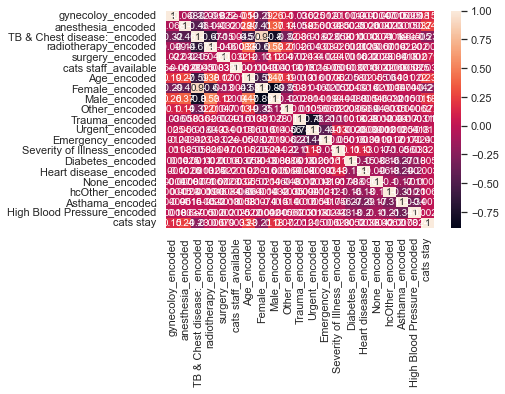

In [19]:
corr = dftrainfinal.corr()
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True);

In [20]:
dftest = pd.read_csv("hospitalizaciones_test.csv")
dftest.head(2)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324


In [21]:
#explorando las variables unicas
for i in range(14):
    print (dftest.columns[i])
    print(dftest.iloc[:,i].unique())
    print("\n")

Available Extra Rooms in Hospital
[ 3  2  4  5  1  9  6 10 13 11 24 20  7 14 12  0 21  8]


Department
['gynecology' 'TB & Chest disease' 'radiotherapy' 'anesthesia' 'surgery']


Ward_Facility_Code
['F' 'E' 'A' 'D' 'B' 'C']


doctor_name
['Dr Olivia' 'Dr John' 'Dr Sam' 'Dr Sarah' 'Dr Sophia' 'Dr Nathan'
 'Dr Mark' 'Dr Isaac' 'Dr Simon']


staff_available
[10  4  7  1  6  5  8  0  9  3  2]


patientid
[  2858  65657  45598 ...  75642 118184  33937]


Age
['21-30' '51-60' '71-80' '41-50' '31-40' '0-10' '61-70' '11-20' '81-90'
 '91-100']


gender
['Female' 'Other' 'Male']


Type of Admission
['Trauma' 'Urgent' 'Emergency']


Severity of Illness
['Moderate' 'Extreme' 'Minor']


health_conditions
['Other' 'Asthama' 'None' 'Diabetes' 'Heart disease' 'High Blood Pressure']


Visitors with Patient
[ 2  3  4  8  6 13 14  5  9  1 10  7 12 23 11 19 22  0 17 32 15 24 18 16
 20 21 25 30]


Insurance
['No' 'Yes']


Admission_Deposit
[4749.640225 4122.261324 5459.067882 ... 5456.930075 4694.127772
 4

In [22]:
enc = OneHotEncoder(sparse=False)
departamentos=dftest["Department"].values.reshape(-1,1)
enc.fit(departamentos)
enc2=enc.transform(departamentos)
print(enc.categories_)
dftest["gynecoloy_encoded"]=enc2[:,0]
dftest["anesthesia_encoded"]=enc2[:,1]
dftest["TB & Chest disease:_encoded"]=enc2[:,2]
dftest["radiotherapy_encoded"]=enc2[:,3]
dftest["surgery_encoded"]=enc2[:,4]

[array(['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy',
       'surgery'], dtype=object)]


In [23]:
bins=[-1,0,10]
labels=[0,1]
cats=pd.cut(dftest["staff_available"],bins, labels = labels)
dftest["cats staff_available"]=cats
dftest["cats staff_available"]=pd.factorize(dftest['cats staff_available'])[0]

In [24]:
y_encoder = LabelEncoder().fit(dftest['Age'])
dftest["Age_encoded"] = y_encoder.transform(dftest['Age'])

In [25]:
enc = OneHotEncoder(sparse=False)
genero=dftest["gender"].values.reshape(-1,1)
enc.fit(genero)
enc2=enc.transform(genero)
print(enc.categories_)
dftest["Female_encoded"]=enc2[:,0]
dftest["Male_encoded"]=enc2[:,1]
dftest["Other_encoded"]=enc2[:,2]

[array(['Female', 'Male', 'Other'], dtype=object)]


In [26]:
enc = OneHotEncoder(sparse=False)
genero=dftest["Type of Admission"].values.reshape(-1,1)
enc.fit(genero)
enc2=enc.transform(genero)
print(enc.categories_)
dftest["Trauma_encoded"]=enc2[:,0]
dftest["Urgent_encoded"]=enc2[:,1]
dftest["Emergency_encoded"]=enc2[:,2]

[array(['Emergency', 'Trauma', 'Urgent'], dtype=object)]


In [27]:
dftest["Severity of Illness_encoded"]=dftest["Severity of Illness"]
dftest["Severity of Illness_encoded"].replace("Minor",0,inplace=True)
dftest["Severity of Illness_encoded"].replace("Moderate",1,inplace=True)
dftest["Severity of Illness_encoded"].replace("Extreme",2,inplace=True)
dftest.iloc[:,3:15].head(10)

,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,gynecoloy_encoded
0,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225,0.0
1,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324,1.0
2,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882,0.0
3,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318,0.0
4,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695,0.0
5,Dr Sam,10,127273,71-80,Male,Trauma,Extreme,Diabetes,2,No,4840.117059,0.0
6,Dr Sarah,6,45625,41-50,Female,Urgent,Minor,Asthama,2,No,5348.684488,0.0
7,Dr Sophia,5,111363,31-40,Female,Trauma,Moderate,Heart disease,4,Yes,3619.299900,0.0
8,Dr John,1,111476,51-60,Female,Trauma,Moderate,Asthama,4,No,4843.129200,0.0
9,Dr Sophia,1,83233,31-40,Female,Trauma,Minor,Heart disease,8,Yes,5965.483139,0.0


In [28]:
enc = OneHotEncoder(sparse=False)
genero=dftest["health_conditions"].values.reshape(-1,1)
enc.fit(genero)
enc2=enc.transform(genero)
print(enc.categories_)
dftest["Diabetes_encoded"]=enc2[:,0]
dftest["Heart disease_encoded"]=enc2[:,1]
dftest["None_encoded"]=enc2[:,2]
dftest["hcOther_encoded"]=enc2[:,3]
dftest["Asthama_encoded"]=enc2[:,4]
dftest["High Blood Pressure_encoded"]=enc2[:,5]

[array(['Asthama', 'Diabetes', 'Heart disease', 'High Blood Pressure',
       'None', 'Other'], dtype=object)]


In [29]:
dftestfinal=dftest.drop(columns=list(dftest.columns)[0:14])

In [30]:
dftestfinal.head()

,gynecoloy_encoded,anesthesia_encoded,TB & Chest disease:_encoded,radiotherapy_encoded,surgery_encoded,cats staff_available,Age_encoded,Female_encoded,Male_encoded,Other_encoded,Trauma_encoded,Urgent_encoded,Emergency_encoded,Severity of Illness_encoded,Diabetes_encoded,Heart disease_encoded,None_encoded,hcOther_encoded,Asthama_encoded,High Blood Pressure_encoded
0,0.0,0.0,1.0,0.0,0.0,0,2,1.0,0.0,0.0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0,5,1.0,0.0,0.0,0.0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0,5,0.0,0.0,1.0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0,2,1.0,0.0,0.0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0,5,1.0,0.0,0.0,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:
dftrainfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   gynecoloy_encoded            410000 non-null  float64
 1   anesthesia_encoded           410000 non-null  float64
 2   TB & Chest disease:_encoded  410000 non-null  float64
 3   radiotherapy_encoded         410000 non-null  float64
 4   surgery_encoded              410000 non-null  float64
 5   cats staff_available         410000 non-null  int64  
 6   Age_encoded                  410000 non-null  int32  
 7   Female_encoded               410000 non-null  float64
 8   Male_encoded                 410000 non-null  float64
 9   Other_encoded                410000 non-null  float64
 10  Trauma_encoded               410000 non-null  float64
 11  Urgent_encoded               410000 non-null  float64
 12  Emergency_encoded            410000 non-null  float64
 13 

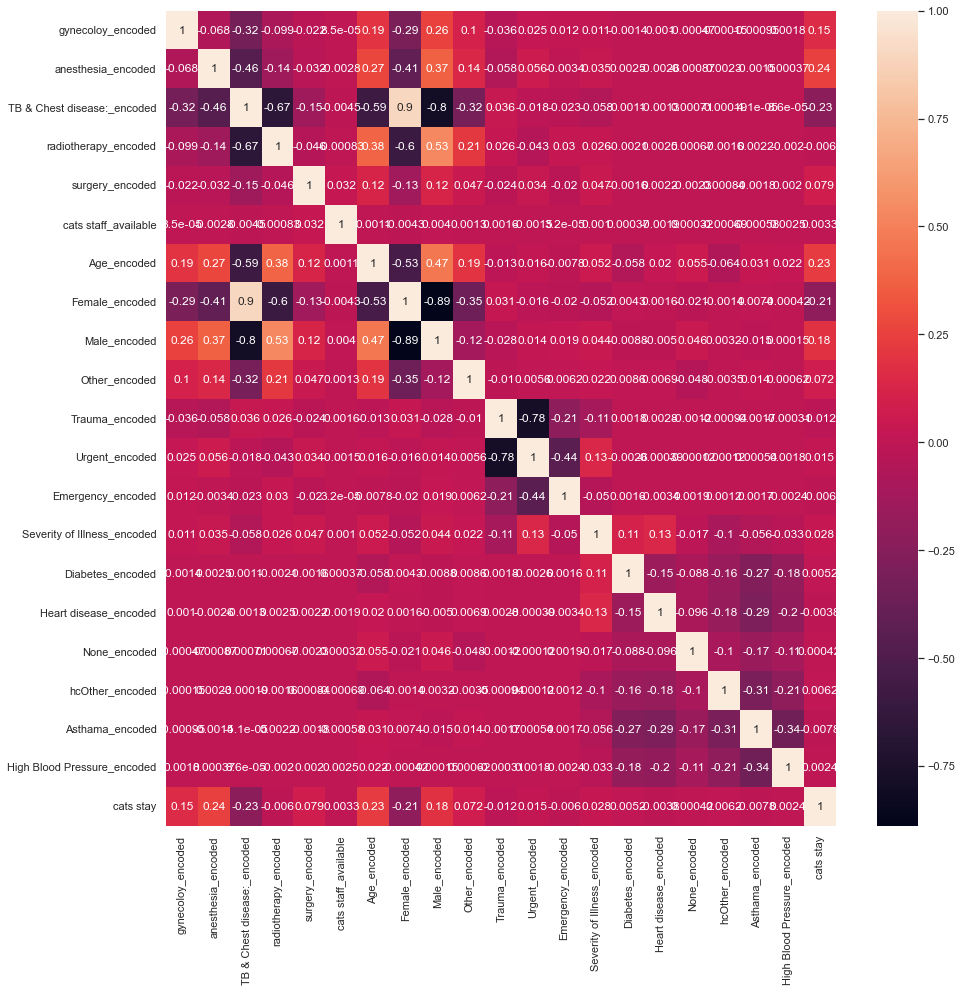

In [32]:
corr = dftrainfinal.corr()
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True);

In [34]:

from sklearn.model_selection import cross_val_score
tree = LogisticRegression(max_iter=1000)
tree_scores = cross_val_score(tree, dftrainfinalx, dfy, cv=5,scoring="accuracy")
print(tree_scores.mean())
print(tree_scores)

0.583460975609756
[0.58513415 0.57939024 0.58456098 0.58407317 0.58414634]


In [35]:
from sklearn.model_selection import cross_val_score
tree = LogisticRegression(max_iter=1000)
tree_scores = cross_val_score(tree, dftrainfinalx, dfy, cv=5,scoring="recall")
print(tree_scores.mean())
print(tree_scores)

0.8405894663304514
[0.85284733 0.81618151 0.84949983 0.84296145 0.84145721]


In [36]:
clf = LogisticRegression(max_iter=1000)

# Lo entrenamos

clf.fit(dftrainfinalx,dfy)

LogisticRegression(max_iter=1000)

In [37]:
y_pred = clf.predict(dftrainfinalx)

In [38]:
accuracy_score(dfy,y_pred)

0.5833560975609756

In [39]:
recall_score(dfy,y_pred)

0.8436550568484354

In [40]:
y_predtest=clf.predict(dftestfinal)

In [41]:
y_predtestcsv=pd.DataFrame(list(y_predtest),columns=["pred"])

In [42]:
y_predtestcsv.head()

,pred
0,1
1,1
2,1
3,1
4,1


In [43]:
y_predtestcsv.to_csv("isaacpc94.csv",index=False)

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from scipy import stats

lr=LogisticRegression(max_iter=1000)
# Hyperparameter search space
search_space = {
    'penalty': ['none','l2', 'l1', 'elasticnet'],
}

# Probamos la estrategia grid search

from sklearn.model_selection import GridSearchCV

# Le pasamos la grilla que creamos
model = GridSearchCV(lr, param_grid=search_space, cv=5,scoring="accuracy")

# Entrenamos
model.fit(dftrainfinalx, dfy)
model.best_params_

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Lenovo\AppData\Local\Programs\P

{'penalty': 'l2'}

In [108]:
clf2 = LogisticRegression(max_iter=1000,penalty="l2")

# Lo entrenamos

clf2.fit(dftrainfinalx,dfy)

LogisticRegression(max_iter=1000)

In [94]:
y_predtest2=clf2.predict(dftrainfinalx)

In [104]:
accuracy_score(dfy,y_predtest2)

0.5833560975609756

In [106]:
recall_score(dfy,y_pred)

0.8436550568484354

In [109]:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from scipy import stats

svm=SVC()
# Hyperparameter search space
search_space = {
    'kernel': ['sigmoid', 'rbf'],
    'C': [0.01, 0.1, 1,10,100,1000],
    'gamma': [0,0.1,1,10,100],
    'coef0': [0,0.1,1],
}

# Probamos la estrategia grid search

from sklearn.model_selection import GridSearchCV

# Le pasamos la grilla que creamos
model = GridSearchCV(svm, param_grid=search_space, cv=5)

# Entrenamos
model.fit(dftrainfinalx, dfy)
model.best_params_